### `ENVIRONMENT SETUP`

In [1]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot  as plt
import seaborn as sns

%matplotlib inline

### `READING EXCEL FILE`

In [2]:
# Changing working directory
filepath = "G:\\Algo8 Assignment\\" 
os.chdir(filepath)

%pwd

'G:\\Algo8 Assignment'

In [3]:
# Reading excel file
df = pd.read_excel("polling day data.xlsx", parse_dates=['Date'])
df['SlNo'] = np.arange(1, len(df) + 1, 1)

In [4]:
# New features from Date feature
df['Weekday'] = df.Date.dt.strftime("%A")
df['Hour'] = df.Date.dt.hour

In [5]:
# Renaming features with space in name
df.rename(columns={'Compound Score':'Compound_Score', 'RT Flag': 'RT_Flag'}, inplace=True)

### `CHECKING DATAFRAME STRUCTURE`

In [6]:
# Top 4 rows from dataframe
df.head()

,Date,Userlocation,Username,Verified,Likes,followers,friends,id,language,retweet_count,...,Sentiment,Compound_Score,Issue,RT_Flag,Engagements,Influencers,Comment,SlNo,Weekday,Hour
0,2019-05-18 23:10:37,NaN,AshishP57673790,False,0,124,942,1129887041787817984,en,12,...,negative,-0.1263,#TimesNowExitPoll,Retweet,0,@TimesNow,No,1,Saturday,23
1,2019-05-18 19:48:40,Mumbai,mohitsmartlove,False,0,1002,59,1129836217003064960,en,12,...,negative,-0.1263,#TimesNowExitPoll,Retweet,0,@TimesNow,No,2,Saturday,19
2,2019-05-18 19:26:11,NaN,Vineeth_aj21,False,0,70,177,1129830560686268032,en,23,...,positive,0.3182,#TimesNowExitPoll,Retweet,0,@TimesNow,No,3,Saturday,19
3,2019-05-18 19:26:08,India,LalPatrakar,False,1,41,172,1129830546933264000,en,1,...,neutral,0.0000,#TimesNowExitPoll,Original,2,Original,No,4,Saturday,19
4,2019-05-18 18:25:04,"Pune, Maharashtra",ShefVaidya,True,0,359774,1748,1129815181960179968,en,12,...,negative,-0.1263,#TimesNowExitPoll,Retweet,0,@TimesNow,No,5,Saturday,18


In [7]:
# Shape of dataframe
df.shape

(33985, 23)

In [8]:
# Data Types
df.dtypes

Date              datetime64[ns]
Userlocation              object
Username                  object
Verified                    bool
Likes                      int64
followers                  int64
friends                    int64
id                         int64
language                  object
retweet_count              int64
text                      object
Hashtags                  object
User_Mentions             object
Sentiment                 object
Compound_Score           float64
Issue                     object
RT_Flag                   object
Engagements                int64
Influencers               object
Comment                   object
SlNo                       int32
Weekday                   object
Hour                       int64
dtype: object

In [9]:
# Checking nulls / missing values in data
np.round(df.isnull().sum()/len(df)*100,2)

Date               0.00
Userlocation      26.09
Username           0.00
Verified           0.00
Likes              0.00
followers          0.00
friends            0.00
id                 0.00
language           0.00
retweet_count      0.00
text               0.00
Hashtags           0.00
User_Mentions     20.60
Sentiment          0.00
Compound_Score     0.00
Issue              0.00
RT_Flag            0.00
Engagements        0.00
Influencers        0.00
Comment            0.00
SlNo               0.00
Weekday            0.00
Hour               0.00
dtype: float64

In [10]:
# Missing value treatment
df.Userlocation.fillna('', inplace=True)
df.User_Mentions.fillna('', inplace=True)

In [11]:
# No of unique values in features
for x in df.columns.values:
    print(f'{x}: {df[x].nunique()}')

Date: 20341
Userlocation: 3920
Username: 15127
Verified: 2
Likes: 324
followers: 2701
friends: 2552
id: 25647
language: 1
retweet_count: 185
text: 9229
Hashtags: 2294
User_Mentions: 1964
Sentiment: 3
Compound_Score: 837
Issue: 6
RT_Flag: 3
Engagements: 355
Influencers: 851
Comment: 2
SlNo: 33985
Weekday: 7
Hour: 24


### `ADDING NEW FEATURES & REMOVING REDUNDANT FEATURES`

In [12]:
# Dropping irrelevant columns
df.drop(['language', 'Verified', 'Comment', 'id'], axis=1,inplace=True)

In [13]:
# Replacing special characters in location feature
df['Userlocation'] = df.Userlocation.apply(lambda x: re.sub('[^a-zA-Z ]', '', x))

# Checking if data is valid  and does not contain only special chcracters like , / "
df['valid_location'] = df.Userlocation.str.contains(pat = '[a-zA-Z]',case=False)

# Replacing invalid data with ''
df.loc[df.valid_location == False, 'Userlocation'] = ''

In [14]:
# Getting all User_Mentions as a single list
user_mention = []
for x in df.User_Mentions.str.split(','):
    for y in x:
        if y != '':
            user_mention.append(y.strip())

In [15]:
# Creating df for User_Mentions
df_um = pd.DataFrame()
df_um['slno'] = np.arange(1, len(user_mention) + 1, 1)
df_um['user_mentions'] = user_mention

In [16]:
# Grouping user mention data to get top 10 User Mentions
um = df_um.groupby('user_mentions').count()
um.rename(columns={'slno': 'Count'}, inplace=True)
um = um.sort_values(by = 'Count', ascending = False)
um = um.head(10)
um.head()

,Count
user_mentions,
IndiaToday,3256
republic,2817
TimesNow,2695
ShivAroor,2422
rahulkanwal,1704


In [17]:
# Getting all Hashtags as a single list
hashtag = []
for x in df.Hashtags.apply(lambda x: re.sub('[][]', '', x)):
    for y in x.split(','):
        if y != '':
            hashtag.append(y.strip())

In [18]:
# Creating df for Hashtags
df_ht = pd.DataFrame()
df_ht['slno'] = np.arange(1, len(hashtag) + 1, 1)
df_ht['hashtags'] = hashtag

In [19]:
# Grouping hashtag data to get top 10 hashtags
ht = df_ht.groupby('hashtags').count()
ht.rename(columns={'slno': 'Count'}, inplace=True)
ht = ht.sort_values(by = 'Count', ascending = False)
ht = ht.head(10)
ht.head()

,Count
hashtags,
ExitPoll2019,11767
IndiaTodayAxisPoll,8583
RepublicExitPoll,7692
AajTakAxisExitPoll,6267
TimesNowExitPoll,3762


In [20]:
# dropping redundant features
df.drop(['Hashtags', 'User_Mentions', 'valid_location'], axis=1, inplace=True)

In [21]:
# Rearranging features of the dataframe
df = df[['SlNo', 'Date', 'Weekday', 'Hour','text', 'Likes', 'retweet_count', 'RT_Flag','Compound_Score', 'Sentiment',
         'Issue', 'Engagements', 'Influencers','Userlocation', 'Username', 'followers', 'friends']]

### `INSIGHTS FROM DATA`

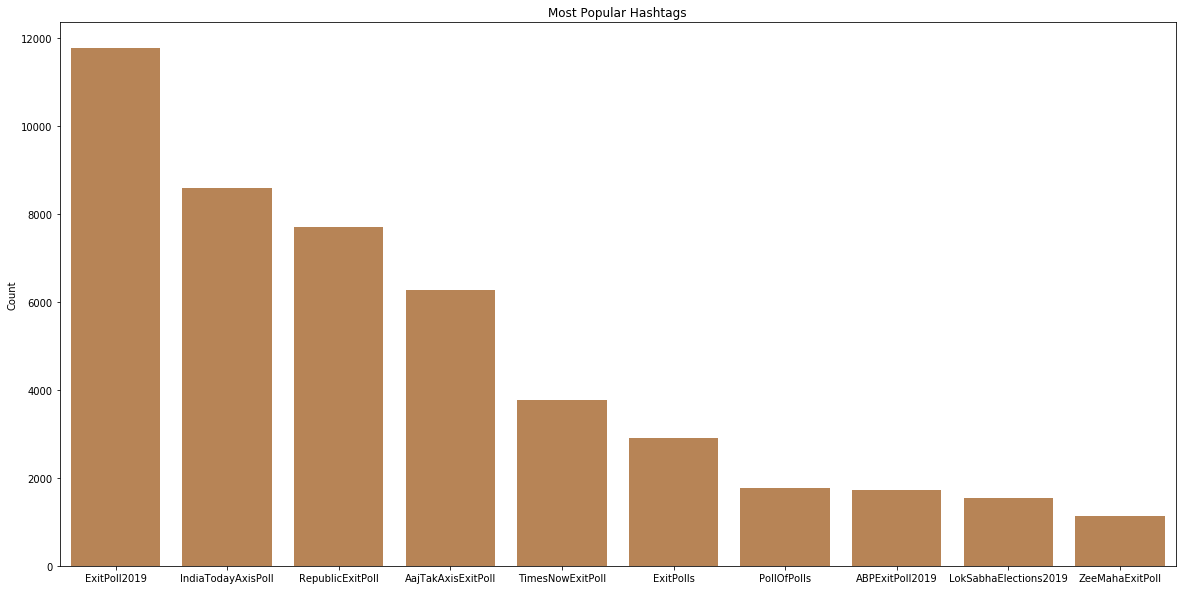

In [22]:
# Most popular Hashtag 
plt.figure(figsize = (20,10));
plt.title('Most Popular Hashtags');
sns.barplot(x = ht.index.values, y = ht.Count, color="C1", saturation=.4);

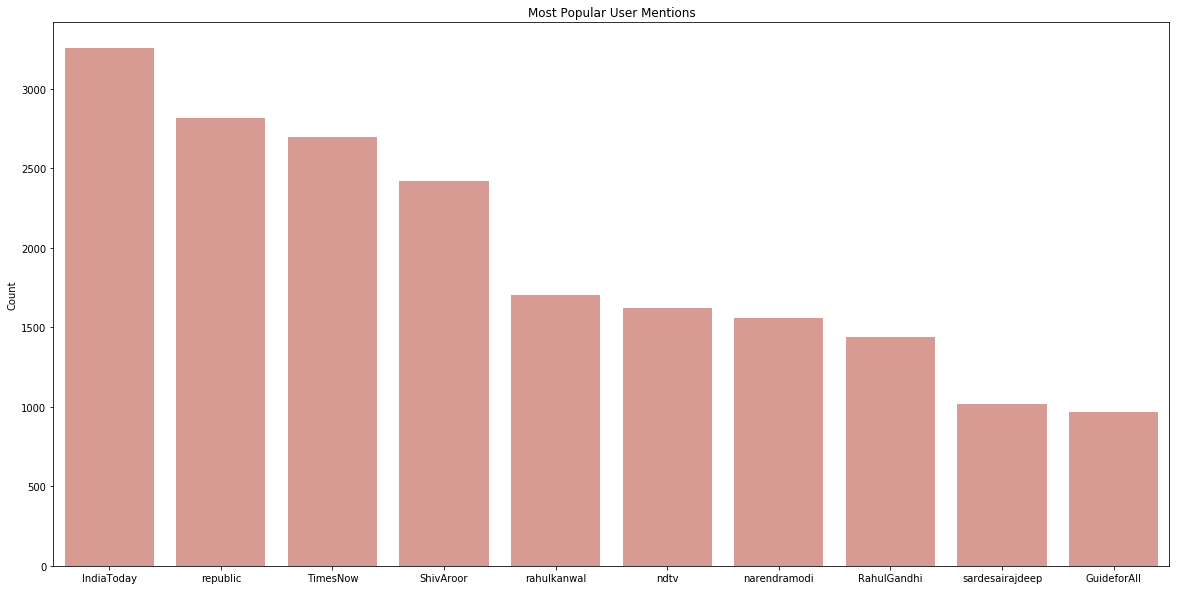

In [23]:
# Most popular User Mentions 
plt.figure(figsize = (20,10));
plt.title('Most Popular User Mentions');
sns.barplot(x = um.index.values, y = um.Count,color="salmon", saturation=.5);

In [24]:
# Top 10 most liked tweets
pd.options.display.max_colwidth = 70
print(df.loc[df.Likes.sort_values(ascending=False).head(10).index.values, 
             ['text','Likes', 'Username']].to_string(index=False))

                                                                  text  Likes         Username
 The #IndiaTodayAxisPoll final numbers:\nNDA: 339-365\nUPA: 77-108\...   7615        ShivAroor
 The #IndiaTodayAxisPoll final numbers:\nNDA: 339-365\nUPA: 77-108\...   7612        ShivAroor
 Arnab Goswami conducting Exit Polls debate with so many panelists ...   4032     Babu_Bhaiyaa
 Fully back @NitishKumar suggestion that elections should not be he...   3354      rahulkanwal
 To those asking why exit polls can’t go wrong in India if they did...   2567  sardesairajdeep
 #TimesNowExitPoll BREAKING | TIMES NOW-VMR 2019 Exit Poll National...   2498         TimesNow
 #NYAY failed to woo the poor voters who preferred the BJP+ this ti...   2133      rahulkanwal
 Bangalore South BJP candidate @Tejasvi_Surya speaks exclusively to...   2010       IndiaToday
 All set for the #ABPExitPoll2019 \nJoin us for the best coverage, ...   1976   RubikaLiyaquat
 #Voting is in #Vogue\n\n#VoteKar #LokSabhaElectio

In [25]:
# Top 10 users with highest liked tweets
print(df.groupby('Username').Likes.sum().sort_values(ascending=False).head(10))

Username
IndiaToday         23928
republic           23683
TimesNow           18746
ShivAroor          15904
ndtv               15660
rahulkanwal         8970
abpnewstv           8645
sardesairajdeep     7791
Babu_Bhaiyaa        4032
manogyaloiwal       3876
Name: Likes, dtype: int64


In [26]:
# Top 10 users with most negative sentiment tweets
neg_senti = df.loc[df.Sentiment == 'negative', ['Username', 'Sentiment']]
neg_senti.rename(columns = {'Sentiment': 'Tweet_Count'}, inplace=True)
neg_senti.groupby('Username').count().sort_values(by= 'Tweet_Count', ascending=False).head(10)

,Tweet_Count
Username,
republic,41
TimesNow,28
IndiaToday,25
IndiaTodayFLASH,23
AnkitModi007,20
mohitsmartlove,20
rajendrashenoy,19
_LogicalIndian_,14
ndtv,13


In [27]:
# Top 10 users with most positive sentiment tweets
pos_senti = df.loc[df.Sentiment == 'positive', ['Username', 'Sentiment']]
pos_senti.rename(columns = {'Sentiment': 'Tweet_Count'}, inplace=True)
pos_senti.groupby('Username').count().sort_values(by= 'Tweet_Count', ascending=False).head(10)

,Tweet_Count
Username,
TimesNow,129
IndiaTodayFLASH,91
IndiaToday,86
ndtv,54
AnkitModi007,53
mohitsmartlove,48
republic,46
saleemsarangs,44
mishravivek03,38


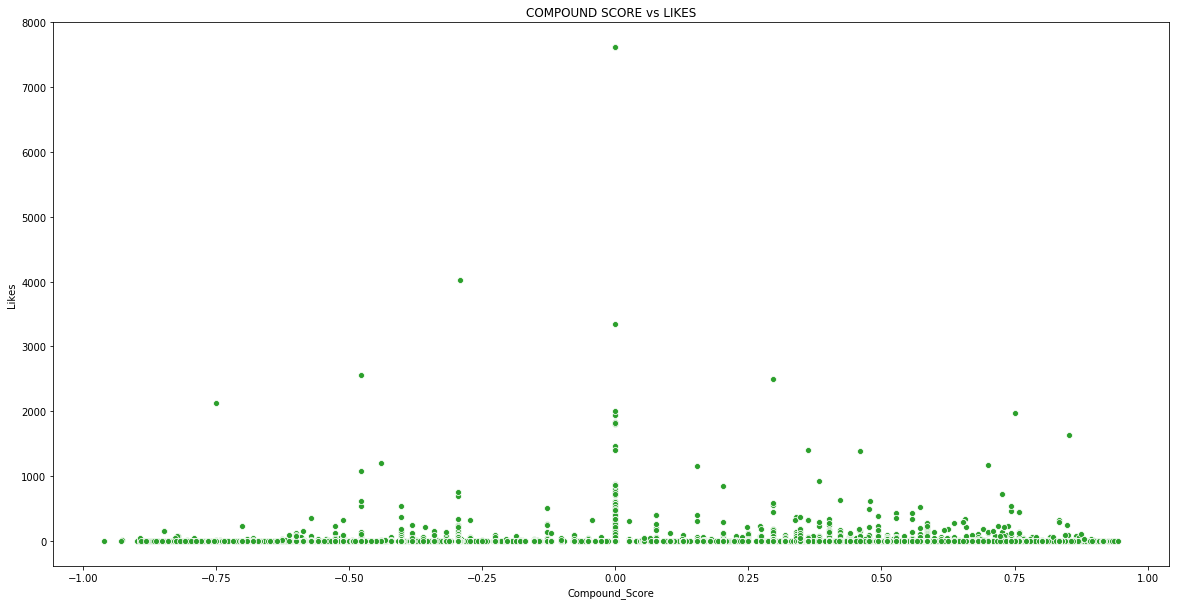

In [41]:
# Sentimnet vs Likes
# df.loc[df.retweet_count.sort_values(ascending=False).head(10).index.values, ['text','retweet_count']]
plt.figure(figsize = (20,10));
plt.title('COMPOUND SCORE vs LIKES')
sns.scatterplot(y = df.Likes, x = df.Compound_Score, color = 'C2');

In [29]:
# Top 10 user account who has influenced most people for tweet
df.groupby('Influencers').SlNo.count().sort_values(ascending=False).head(10)

Influencers
Original         9907
@IndiaToday      2681
@TimesNow        2541
@ShivAroor       2408
@republic        2249
@ndtv            1441
@rahulkanwal      976
@GuideforAll      967
@abpnewstv        706
@Babu_Bhaiyaa     586
Name: SlNo, dtype: int64

In [30]:
# Top toipcs for tweets
df.groupby('Issue').SlNo.count().sort_values(ascending=False)

Issue
#RepublicExitPoll      9704
#IndiaTodayAxisPoll    9699
#AajTakAxisExitPoll    5449
#TimesNowExitPoll      4698
#PollOfPolls           2510
#ABPExitPoll2019       1925
Name: SlNo, dtype: int64

In [31]:
# Likes vs sentiments 
df.groupby('Sentiment').Likes.sum().sort_values(ascending = False)

Sentiment
neutral     103528
positive     67145
negative     30035
Name: Likes, dtype: int64

In [32]:
# Tweets during the day
df.groupby('Hour').SlNo.count().sort_values(ascending = False)

Hour
15    5005
13    4634
16    4394
14    3971
17    3305
12    2235
18    1731
11    1162
19     940
10     797
7      641
5      635
3      513
8      490
6      484
4      483
9      479
2      417
20     384
23     331
1      298
0      240
21     209
22     207
Name: SlNo, dtype: int64

In [33]:
# Tweets during the weekdays
df.groupby('Weekday').SlNo.count().sort_values(ascending = False)

Weekday
Sunday       27657
Monday        5389
Saturday       797
Thursday        60
Tuesday         51
Wednesday       22
Friday           9
Name: SlNo, dtype: int64

### `SAVING PROCESSED DATA TO DISK`

In [34]:
# Saving cleaned tweets data 
df.to_excel('Tweet_Data.xlsx', sheet_name='Tweet_Data',index=False)

In [35]:
# Saving Hashtag data
df_ht.to_excel('Hashtag.xlsx', sheet_name='Hashtag_Data',index=False)

In [36]:
# Saving User Mention data
df_um.to_excel('User_Mention.xlsx', sheet_name='UserMention_Data',index=False)